You can go to this website: https://data.stackexchange.com/stackoverflow/query/edit/1889053
and run my query to fetch the newest data

<code>
-- Query: Programming Languages Popularity Over Time
SELECT 
  DATEADD(MONTH, DATEDIFF(MONTH, 0, p.CreationDate), 0) AS [Month],
  t.TagName,
  COUNT(*) AS [RequestCount]
FROM Posts p
JOIN PostTags pt ON p.Id = pt.PostId
JOIN Tags t ON pt.TagId = t.Id
WHERE t.TagName IN ('java', 'c', 'c++', 'python', 'c#', 'javascript', 'assembly', 'php', 'perl', 'ruby', 'visual basic', 'swift', 'r', 'object-c', 'scratch', 'go', 'delphi')
  AND p.CreationDate < DATEADD(MONTH, DATEDIFF(MONTH, 0, GETDATE()), 0)
GROUP BY 
  DATEADD(MONTH, DATEDIFF(MONTH, 0, p.CreationDate), 0), 
  t.TagName
ORDER BY 
  [Month] ASC, 
  [RequestCount] DESC;
  </code>

In [1]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read the .csv file and stor ir in a Pandas dataframe
# header=0 removes the first column from .csv file
df = pd.read_csv('QueryResults.csv', names=['DATE', 'TAG', 'POSTS'], header=0)

In [3]:
# Check the df head
df.head()

,DATE,TAG,POSTS
0,2008-07-01 00:00:00,c#,3
1,2008-08-01 00:00:00,c#,503
2,2008-08-01 00:00:00,java,220
3,2008-08-01 00:00:00,c++,164
4,2008-08-01 00:00:00,javascript,160


In [4]:
# Check the df tail
df.tail() 

,DATE,TAG,POSTS
2742,2025-01-01 00:00:00,go,134
2743,2025-01-01 00:00:00,assembly,70
2744,2025-01-01 00:00:00,delphi,57
2745,2025-01-01 00:00:00,ruby,51
2746,2025-01-01 00:00:00,perl,25


In [5]:
# Check the number of rows and columns aka. The dimensions of the dataframe
df.shape

(2747, 3)

In [6]:
# Count the number of entries in each column of the df
df.count()

DATE     2747
TAG      2747
POSTS    2747
dtype: int64

In [7]:
# Calculate the total number of post per language
df.groupby('TAG').sum()

,DATE,POSTS
TAG,,
assembly,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,44967
c,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,407207
c#,2008-07-01 00:00:002008-08-01 00:00:002008-09-...,1623605
c++,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,812883
delphi,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,52349
go,2009-11-01 00:00:002009-12-01 00:00:002010-01-...,74180
java,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,1918954
javascript,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,2531126
perl,2008-08-01 00:00:002008-09-01 00:00:002008-10-...,68292


In [8]:
# Reformat the DATE string into datetime object to help with plotting
df['DATE'] = pd.to_datetime(df['DATE'])

In [9]:
df

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,c#,503
2,2008-08-01,java,220
3,2008-08-01,c++,164
4,2008-08-01,javascript,160
...,...,...,...
2742,2025-01-01,go,134
2743,2025-01-01,assembly,70
2744,2025-01-01,delphi,57
2745,2025-01-01,ruby,51


In [10]:
# Pivot the data so each category(language) has its own column
reshaped_df = df.pivot(index='DATE', columns='TAG', values='POSTS')

In [12]:
# Check the new shape of formatted data
reshaped_df.shape

(199, 14)

In [13]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2008-08-01,8.0,82.0,503.0,164.0,13.0,NaN,220.0,160.0,28.0,157.0,119.0,NaN,68.0,NaN
2008-09-01,28.0,320.0,1640.0,753.0,104.0,NaN,1123.0,630.0,129.0,474.0,534.0,6.0,286.0,NaN
2008-10-01,16.0,303.0,1985.0,805.0,112.0,NaN,1146.0,720.0,128.0,603.0,505.0,NaN,246.0,NaN
2008-11-01,16.0,258.0,1729.0,733.0,139.0,NaN,953.0,581.0,97.0,497.0,447.0,1.0,154.0,NaN


In [14]:
reshaped_df.tail()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2024-09-01,85.0,444.0,1560.0,976.0,67.0,152.0,1268.0,2155.0,26.0,604.0,3678.0,744.0,81.0,503.0
2024-10-01,90.0,465.0,1589.0,916.0,85.0,177.0,1508.0,1875.0,21.0,650.0,3474.0,785.0,63.0,458.0
2024-11-01,98.0,401.0,1355.0,845.0,56.0,125.0,1260.0,1637.0,20.0,539.0,3140.0,694.0,75.0,386.0
2024-12-01,90.0,328.0,1093.0,689.0,42.0,114.0,1167.0,1390.0,24.0,427.0,2697.0,551.0,53.0,316.0
2025-01-01,70.0,329.0,1165.0,733.0,57.0,134.0,1193.0,1480.0,25.0,535.0,2816.0,533.0,51.0,353.0


In [15]:
# Convert Nan into numerical data. The best way is to turn it into 0
reshaped_df.fillna(0, inplace=True)

In [16]:
reshaped_df.head()

TAG,assembly,c,c#,c++,delphi,go,java,javascript,perl,php,python,r,ruby,swift
DATE,,,,,,,,,,,,,,
2008-07-01,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2008-08-01,8.0,82.0,503.0,164.0,13.0,0.0,220.0,160.0,28.0,157.0,119.0,0.0,68.0,0.0
2008-09-01,28.0,320.0,1640.0,753.0,104.0,0.0,1123.0,630.0,129.0,474.0,534.0,6.0,286.0,0.0
2008-10-01,16.0,303.0,1985.0,805.0,112.0,0.0,1146.0,720.0,128.0,603.0,505.0,0.0,246.0,0.0
2008-11-01,16.0,258.0,1729.0,733.0,139.0,0.0,953.0,581.0,97.0,497.0,447.0,1.0,154.0,0.0


In [17]:
# Check if there are any other NaN values in the dataset
reshaped_df.isna().values.any()

np.False_

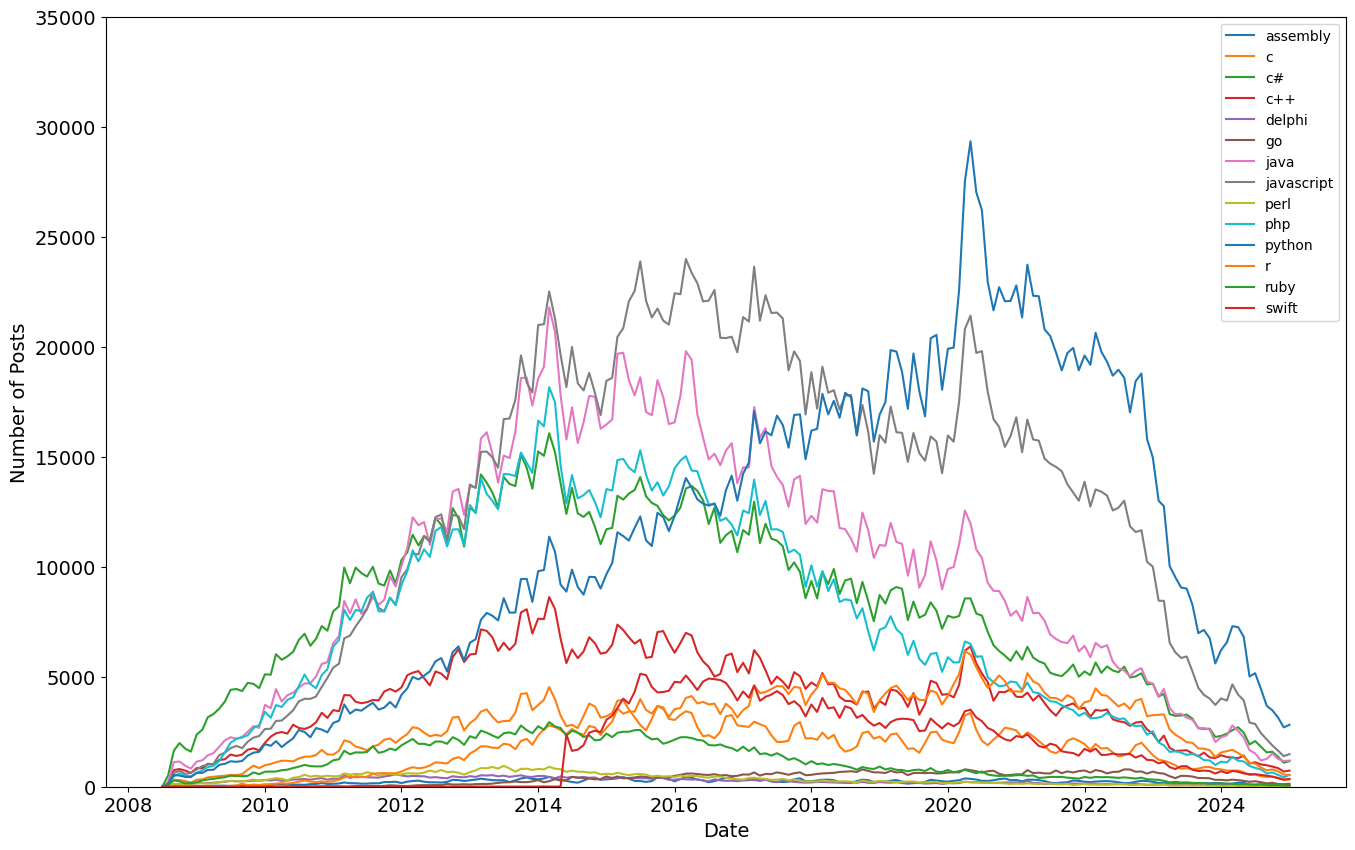

In [18]:
# Visualise the Data with Matplotlib

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14) # set X-axis label
plt.ylabel('Number of Posts', fontsize=14) # set Y-axis label

# Set the floor value to 0, since we cannot get negative number of posts
plt.ylim(0, 35000)

# plot every language in the df
for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, reshaped_df[column], label=reshaped_df[column].name)
    
plt.legend()

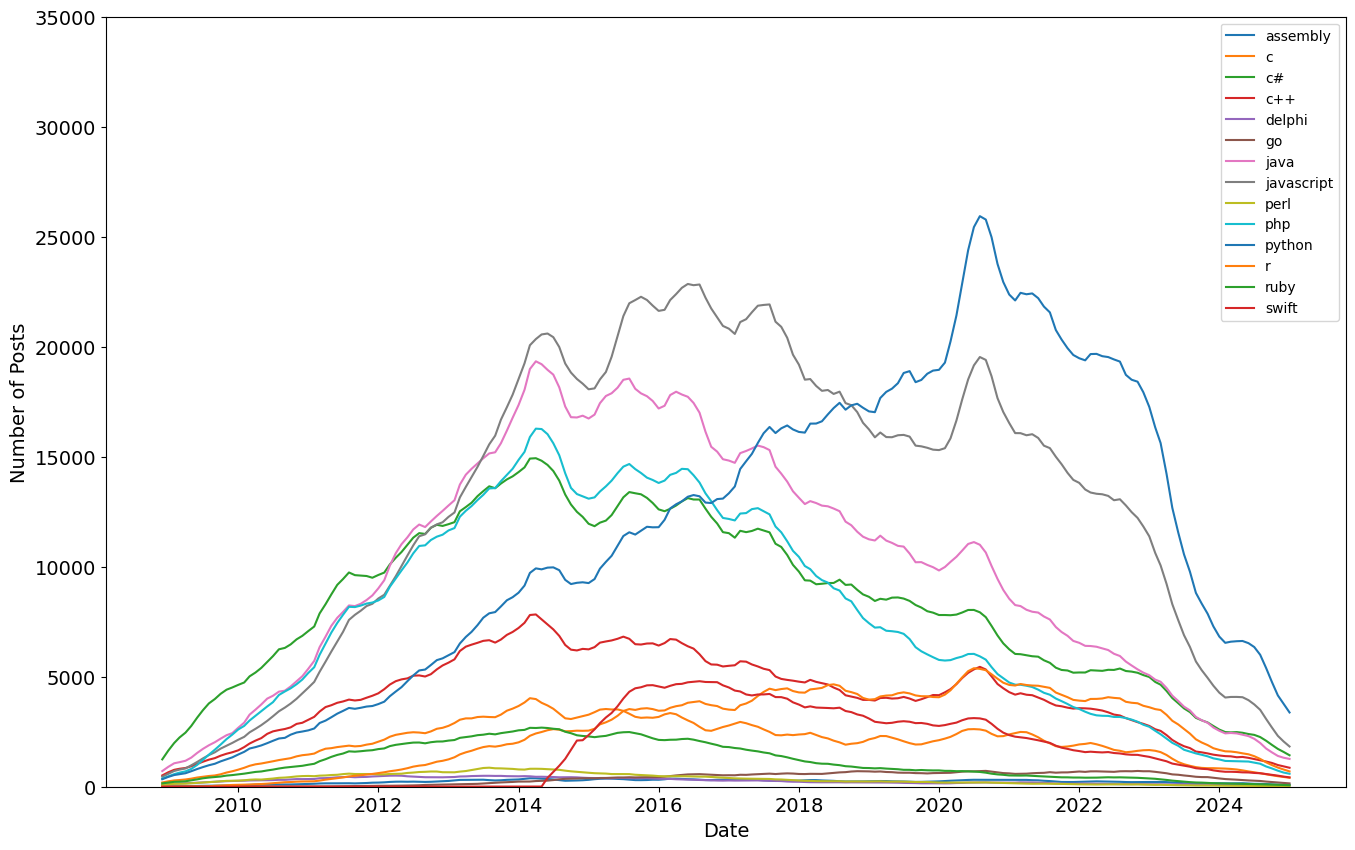

In [19]:
# It's a good idea to smooth the graph
# One of the techniques to better see the trend is a use of rolling() method. It takes a given average observations and moves it forward by one observation.


# window is the number of averaged observations
roll_df = reshaped_df.rolling(window=6).mean()

plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)

for column in reshaped_df.columns:
    plt.plot(reshaped_df.index, roll_df[column], label=reshaped_df[column].name)
    
plt.legend()